In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Users\Aadil Shekh\Desktop\Data\newdata.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51318 entries, 0 to 51317
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51297 non-null  object        
 1   order_date      51318 non-null  datetime64[ns]
 2   ship_date       51318 non-null  datetime64[ns]
 3   ship_mode       51318 non-null  object        
 4   customer_name   51318 non-null  object        
 5   segment         51318 non-null  object        
 6   state           51318 non-null  object        
 7   country         51318 non-null  object        
 8   market          51318 non-null  object        
 9   region          51318 non-null  object        
 10  product_id      51297 non-null  object        
 11  category        51318 non-null  object        
 12  sub_category    51318 non-null  object        
 13  product_name    51318 non-null  object        
 14  product_name.1  43540 non-null  object        
 15  pr

In [4]:
df.isnull().sum()

order_id             21
order_date            0
ship_date             0
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id           21
category              0
sub_category          0
product_name          0
product_name.1     7778
product_name.2    50617
product_name.3    51157
product_name.4    51294
product_name.5    51312
Unit Price            0
quantity              0
discount              0
shipping_cost         0
order_priority        0
sales                 0
expenses              0
revenue               0
year                  0
dtype: int64

In [5]:
df.dropna(subset=['order_id','product_id'],inplace=True)

In [6]:
df.drop(columns=['product_name.1','product_name.2','product_name.3','product_name.4','product_name.5'], axis=1, inplace= True)

In [7]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'Unit Price', 'quantity',
       'discount', 'shipping_cost', 'order_priority', 'sales', 'expenses',
       'revenue ', 'year'],
      dtype='object')

In [8]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
Unit Price        0
quantity          0
discount          0
shipping_cost     0
order_priority    0
sales             0
expenses          0
revenue           0
year              0
dtype: int64

In [9]:
df.duplicated().sum()

20

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(51256, 23)

# Order as per year

In [12]:
df['year'].unique()

array([2011, 2088, 2001, 2012, 2013, 2014], dtype=int64)

In [13]:
df['year'].value_counts()

year
2014    17489
2013    13799
2012    10962
2011     9004
2088        1
2001        1
Name: count, dtype: int64

In [14]:
df=df[df['year']!=2001]
df=df[df['year']!=2088]

In [15]:
df['year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

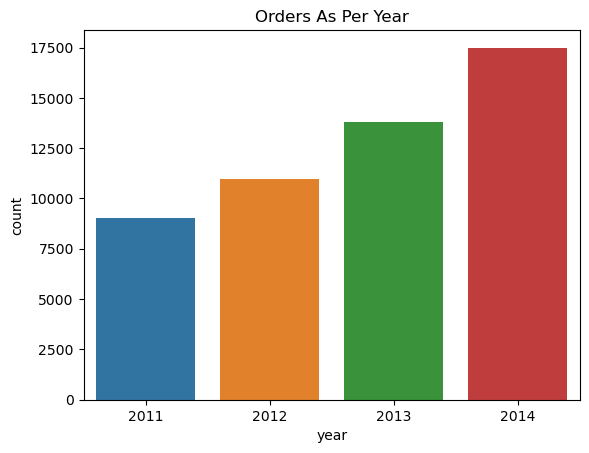

In [16]:
sns.countplot(x='year',data=df)
plt.title('Orders As Per Year')
plt.show()

# Order Priority

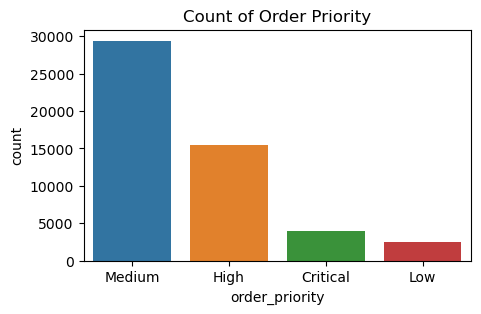

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x='order_priority',data=df)
plt.title('Count of Order Priority')
plt.show()

# Ship Mode

In [18]:
x=df['ship_mode'].unique()
y=df['ship_mode'].value_counts().values

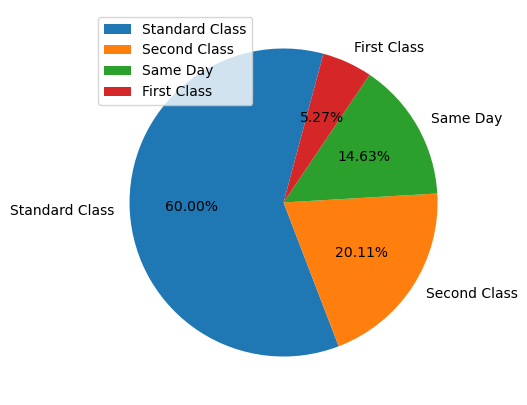

In [19]:
plt.figure(figsize=(5,5))
plt.pie(y,labels=x,startangle=75,autopct='%0.2f%%')
plt.legend(loc=2)
plt.show()

# Product Category as per Ship Mode

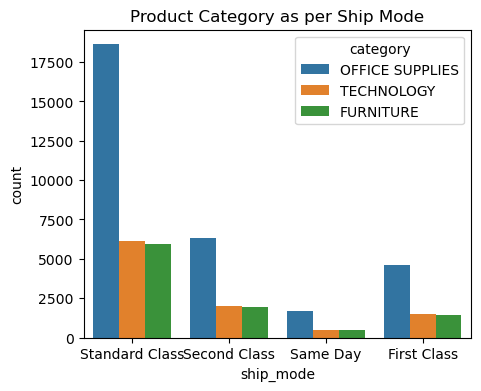

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='ship_mode',hue='category',data=df)
plt.title('Product Category as per Ship Mode')
plt.show()

# Customer Segemnt

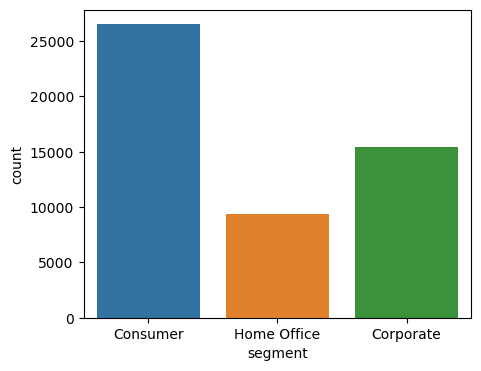

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='segment',data=df)
plt.show()

# Product Category

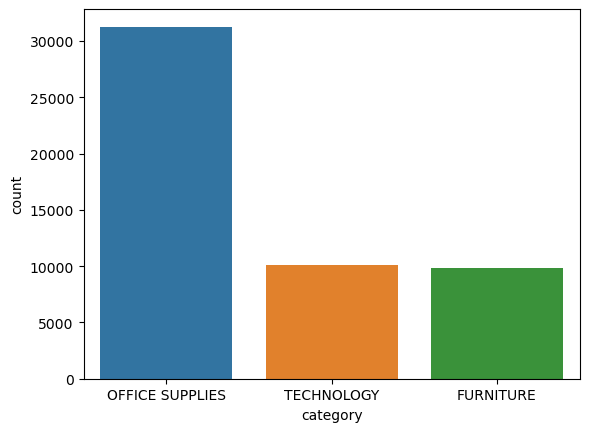

In [22]:
sns.countplot(x='category',data=df)
plt.show()

# Contibution of Sub Categories in Different Category 

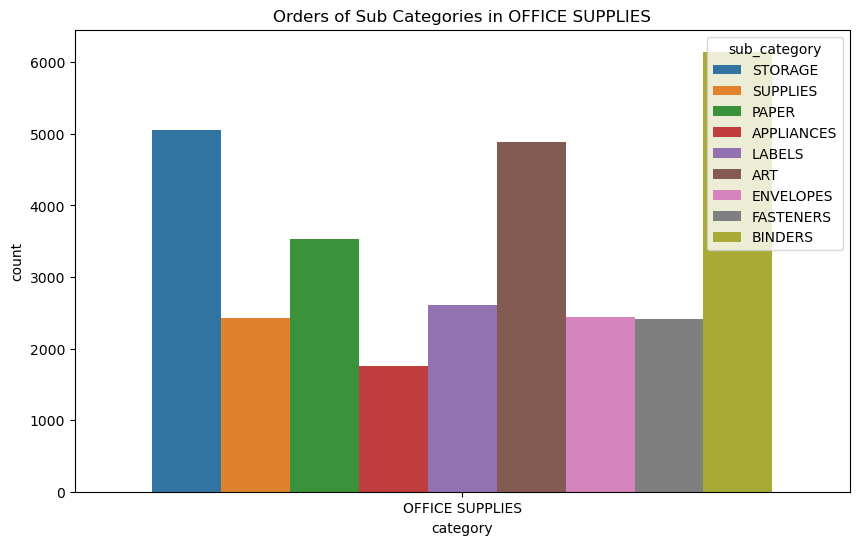

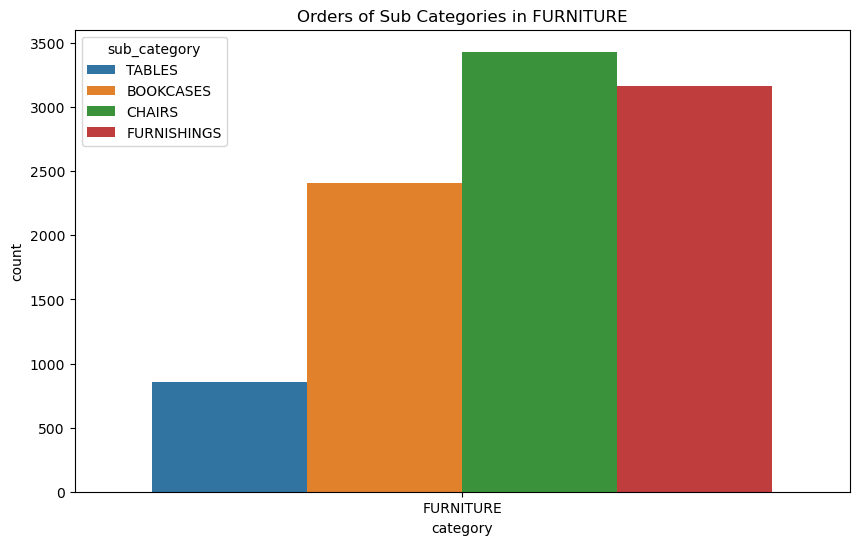

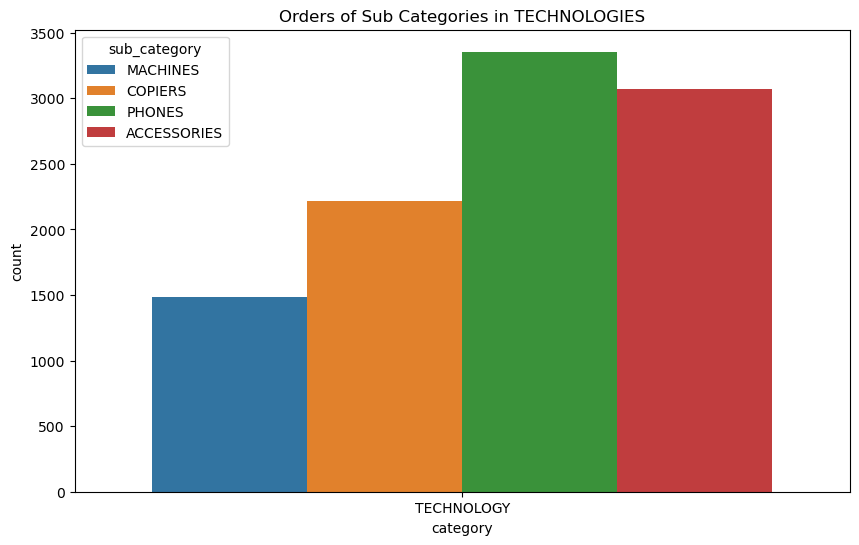

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='category',data=df[df['category']=='OFFICE SUPPLIES'],hue='sub_category')
plt.title('Orders of Sub Categories in OFFICE SUPPLIES')
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(x='category',data=df[df['category']=='FURNITURE'],hue='sub_category')
plt.title('Orders of Sub Categories in FURNITURE')
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(x='category',data=df[df['category']=='TECHNOLOGY'],hue='sub_category')
plt.title('Orders of Sub Categories in TECHNOLOGIES')
plt.show()

# Revenue in Every Category

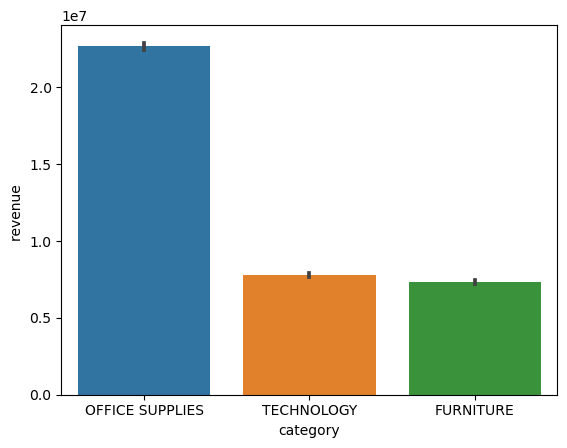

In [24]:
sns.barplot(x='category',y='revenue ',data=df,estimator='sum')
plt.show()

# Top 5 States with High Orders

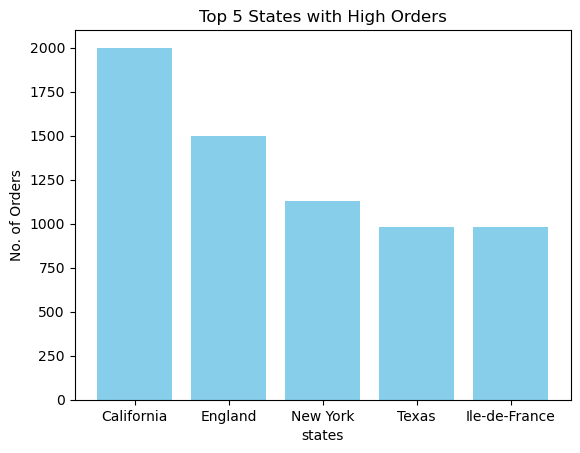

In [25]:
x=['California', 'England', 'New York', 'Texas', 'Ile-de-France']
y=[2000,1497,1127,984,981]
plt.bar(x,y,color='skyblue')
plt.xlabel('states')
plt.ylabel('No. of Orders')
plt.title('Top 5 States with High Orders')
plt.show()

# last year(2014) top 5 staes with high no. of orders


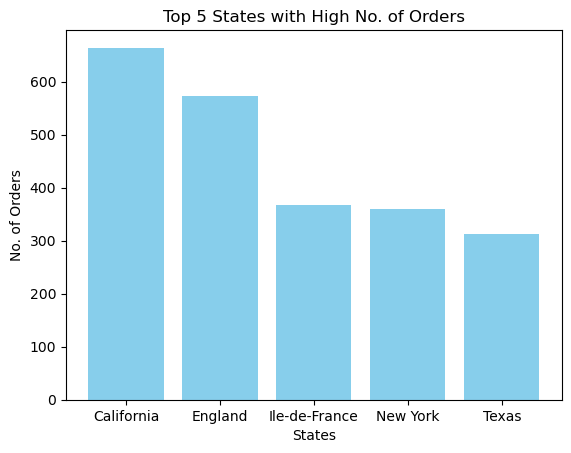

In [26]:
x=['California', 'England', 'Ile-de-France', 'New York', 'Texas']            
y=[664,572,367,359,312]
plt.bar(x,y,color='skyblue')
plt.title('Top 5 States with High No. of Orders')
plt.xlabel('States')
plt.ylabel('No. of Orders')
plt.show()

# Total Discounts given to each Sub Category

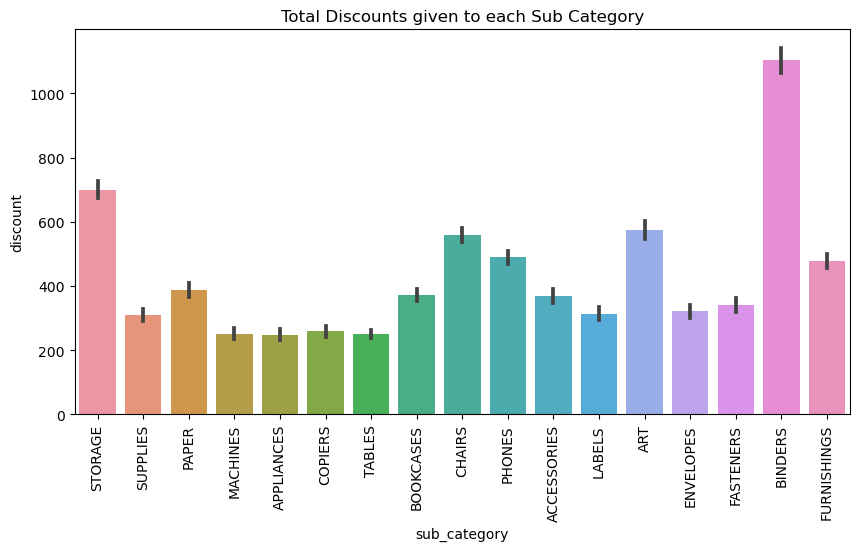

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='sub_category',y='discount',data=df,estimator='sum')
plt.xticks(rotation=90)
plt.title('Total Discounts given to each Sub Category')
plt.show()